In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\RafoffTech\Downloads\titanic.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# .Survival Analysis:


# a. What was the overall survival rate on the Titanic?


In [4]:
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")

Overall Survival Rate: 38.38%


# b. Did passengers in certain classes have a higher chance of survival?




Survival Rates by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


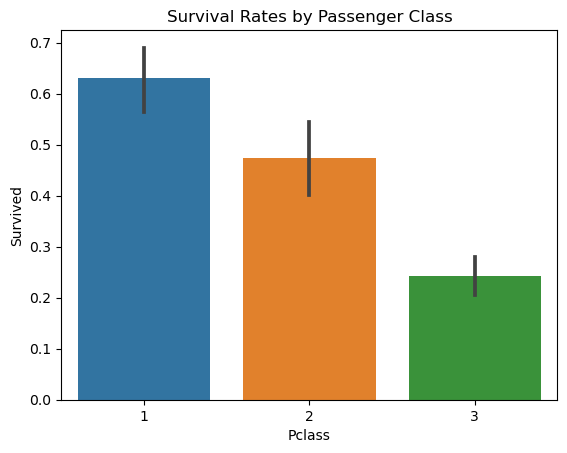

In [13]:
class_survival_rates = df.groupby('Pclass')['Survived'].mean() 
print("\nSurvival Rates by Passenger Class:")
print(class_survival_rates)

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rates by Passenger Class")
plt.show()

# c. Did gender play a role in survival rates?



Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


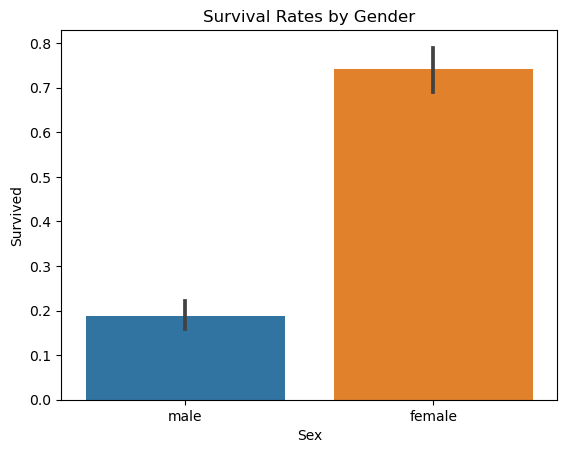

In [12]:
gender_survival_rates = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rates by Gender:")
print(gender_survival_rates)

sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rates by Gender")
plt.show()

# .d. Were passengers with siblings or spouses more likely to survive?


In [7]:
sibsp_survival_rates = df.groupby('SibSp')['Survived'].mean()
print("\nSurvival Rates by the Number of Siblings/Spouses Aboard:")
print(sibsp_survival_rates)



Survival Rates by the Number of Siblings/Spouses Aboard:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


# e. Did having parents or children aboard the Titanic influence survival rates?

In [8]:
parch_survival_rates = df.groupby('Parch')['Survived'].mean()
print("\nSurvival Rates by the Number of Parents/Children Aboard:")
print(parch_survival_rates)


Survival Rates by the Number of Parents/Children Aboard:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


# .Age and Survival:


# a. What was the age distribution of passengers on the Titanic?

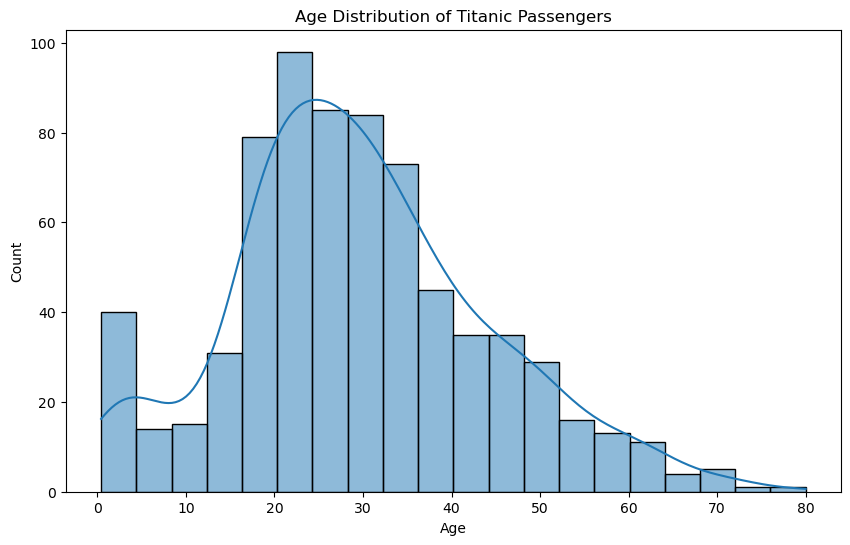

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

# b. Did age impact a passenger's likelihood of survival?

In [15]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])
age_survival_rates = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival Rates by Age Group:")
print(age_survival_rates)



Survival Rates by Age Group:
AgeGroup
Child      0.503597
Adult      0.388788
Elderly    0.227273
Name: Survived, dtype: float64


# c. Were children given priority in the lifeboats?


Survival Rate for Children: 0.5035971223021583
Survival Rate for Adults: 0.3887884267631103
Survival Rate for the Elderly: 0.22727272727272727


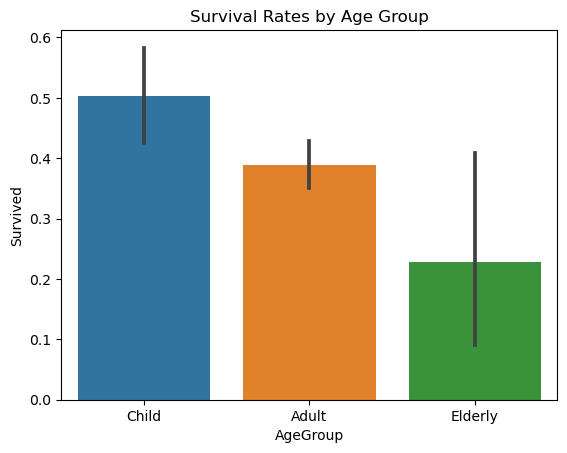

In [20]:
child_survival_rate = age_survival_rates['Child']
adult_survival_rate = age_survival_rates['Adult']
elderly_survival_rate = age_survival_rates['Elderly']
print("\nSurvival Rate for Children:", child_survival_rate)
print("Survival Rate for Adults:", adult_survival_rate)
print("Survival Rate for the Elderly:", elderly_survival_rate)

sns.barplot(x='AgeGroup', y='Survived', data=df, order=['Child', 'Adult', 'Elderly'])
plt.title("Survival Rates by Age Group")
plt.show()


# Ticket Fare And Survival

# a. What was the distribution of ticket fares?

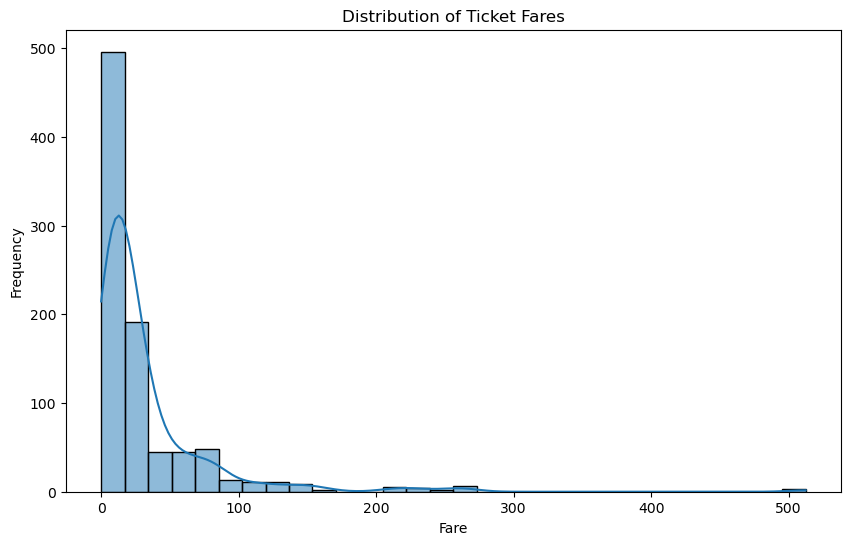

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Distribution of Ticket Fares")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


# b. Did passengers who paid more for their tickets have a higher chance of survival?

In [22]:
fare_survival_corr = df['Fare'].corr(df['Survived'])
print(f"\nCorrelation between Fare and Survival: {fare_survival_corr:.2f}")



Correlation between Fare and Survival: 0.26


# c. Did the ticket fare correlate with the passenger class?



In [23]:
class_fare_corr = df['Pclass'].corr(df['Fare'])
print(f"\nCorrelation between Pclass and Fare: {class_fare_corr:.2f}")



Correlation between Pclass and Fare: -0.55


In [ ]:
Port of Embarkation:


# a. How many passengers embarked from each of the three ports (Southampton, Cherbourg, and Queenstown)?#

In [25]:
port_counts = df['Embarked'].value_counts()
print("\nNumber of Passengers Embarked at Each Port:")
print(port_counts)


Number of Passengers Embarked at Each Port:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


# b. Did the port of embarkation influence a passenger's survival chances?



In [26]:
port_survival_rates = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rates by Port of Embarkation:")
print(port_survival_rates)



Survival Rates by Port of Embarkation:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


# Family Size: 

# a. What was the average family size on the Titanic?

In [27]:
df['FamilySize'] = df['SibSp'] + df['Parch']
average_family_size = df['FamilySize'].mean()
print(f"\nAverage Family Size on the Titanic: {average_family_size:.2f}")


Average Family Size on the Titanic: 0.90


# b. Did passengers traveling alone have a different survival rate compared to those with family members aboard?

In [28]:
alone_survival_rate = df[df['FamilySize'] == 0]['Survived'].mean()
with_family_survival_rate = df[df['FamilySize'] > 0]['Survived'].mean()
print(f"\nSurvival Rate for Passengers Traveling Alone: {alone_survival_rate:.2%}")
print(f"Survival Rate for Passengers with Family Aboard: {with_family_survival_rate:.2%}")



Survival Rate for Passengers Traveling Alone: 30.35%
Survival Rate for Passengers with Family Aboard: 50.56%


# Cabin and Deck Information:


# a. How many passengers had cabin information available in the dataset?

In [29]:
passengers_with_cabin_info = df['Cabin'].count()
print(f"\nNumber of Passengers with Cabin Information: {passengers_with_cabin_info}")



Number of Passengers with Cabin Information: 204


# b. Did the deck level (A, B, C, etc.) where a passenger's cabin was located affect their survival?

In [30]:
df['Deck'] = df['Cabin'].str.extract(r'([A-Z])')
deck_survival_rates = df.groupby('Deck')['Survived'].mean()
print("\nSurvival Rates by Cabin Deck:")
print(deck_survival_rates)


Survival Rates by Cabin Deck:
Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64


# Name Analysis:


# a. What are the most common titles (e.g., Mr., Mrs., Miss) among passengers, and did they impact survival?

In [31]:
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.')
common_titles = df['Title'].value_counts()
print("\nMost Common Titles:")
print(common_titles)


Most Common Titles:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


 # Missing Data Analysis:

# a. How much missing data is there in the dataset for various attributes, and how should it be handled?

In [32]:
missing_data = df.isnull().sum()
print("\nMissing Data Summary:")
print(missing_data)



Missing Data Summary:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FamilySize       0
Deck           687
Title            0
dtype: int64


# b. Did the absence of certain data, like age or cabin information, impact the analysis?


# Survival over time 

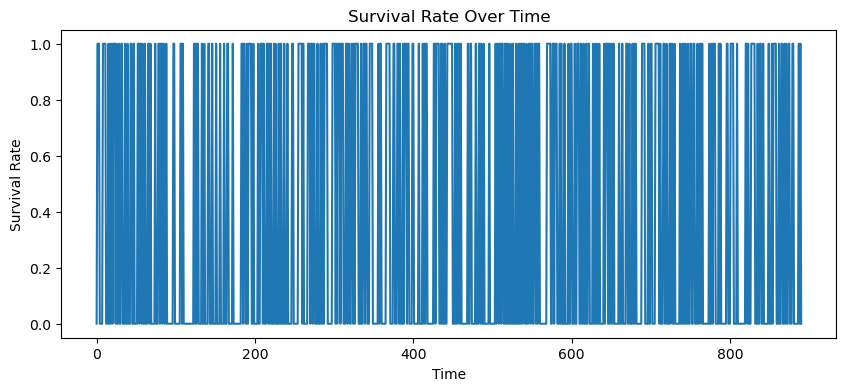

In [33]:
df['Time'] = np.arange(len(df))  # Creating a synthetic time column
survival_over_time = df.groupby('Time')['Survived'].mean()
plt.figure(figsize=(10, 4))
plt.plot(survival_over_time.index, survival_over_time.values)
plt.title("Survival Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Survival Rate")
plt.show()

# a. Can we identify any interactions between different features that had a significant impact on survival?